In [ ]:
#ваш код здесь
import re
experience = pd.DataFrame()

experience['лет'] = hhdb['Опыт работы'].apply(lambda x: re.search(r'(\d+) лет', str(x)).group(1) 
                                              if re.search(r'(\d+) лет', str(x)) else None)
experience['месяцев'] = hhdb['Опыт работы'].apply(lambda x: re.search(r'(\d+) месяцев', str(x)).group(1) 
                                                  if re.search(r'(\d+) месяцев', str(x)) else None)
experience['лет'] = experience['лет'].astype(float)
experience['месяцев'] = experience['месяцев'].astype(float)

# Функция для проверки, является ли значение числом
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
# Фильтруем строки, где значения в столбце 'Values' не являются числами
target_column = 'лет'
experience = experience[experience[target_column].apply(is_numeric)]
target_column = 'месяцев'
experience = experience[experience[target_column].apply(is_numeric)]
print ("experience")
display(experience)


# Можем сделать Заключение:
# что нужно удалить данные в которых колличество отработанных лет более 60;
# что нужно удалить данные в которых колличество отработанных месяцев более 12;
# но тут возможен нюанс, не является ли это ошибкой так как 12 месяцев должно записываться как 1 год


def logarithm_of_histogram(data, colum, title):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    log_htm = np.log(data[colum] + 1)
    histplot = sns.histplot(log_htm, bins=30, ax=ax)
    histplot.axvline(log_htm.mean(), color='k', lw=2)
    histplot.axvline(log_htm.mean()+ 3 * log_htm.std(), color='k', ls='--', lw=2)
    histplot.axvline(log_htm.mean()- 3 * log_htm.std(), color='k', ls='--', lw=2)

    # Подсчет выбросов
    outliers_left = sum(log_htm < log_htm.mean() - 3.25 * log_htm.std())
    outliers_right = sum(log_htm > log_htm.mean() + 3.25 * log_htm.std())
    
    # Добавьте аннотации с количеством выбросов
    histplot.annotate(f'Outliers Left: {outliers_left}', xy=(log_htm.mean() - 3 * log_htm.std(), 0),
                      xytext=(log_htm.mean() - 4 * log_htm.std(), 50), arrowprops=dict(facecolor='red', shrink=0.05))
    
    histplot.annotate(f'Outliers Right: {outliers_right}', xy=(log_htm.mean() + 3 * log_htm.std(), 0),
                      xytext=(log_htm.mean() + 4 * log_htm.std(), 50), arrowprops=dict(facecolor='red', shrink=0.05))
    
    histplot.set_title(title);
    histplot.legend()
    return fig

logarithm_of_histogram(experience, 'лет', "по годам")


# Удаление строк, где данные по колонке "лет" более 60
experience = experience[experience['лет'] < 60]
# Удаление строк, где данные по колонке "месяцев" более 12
experience = experience[experience['месяцев'] < 12]



"""fig, axes = plt.subplots(figsize=(15, 4))
boxplot = sns.boxplot(data=experience, x='лет');
boxplot.set_title('Анализируем данные количества отработанных лет');
# Выводим строки, выходящие за пределы "усов"
outliers_let = experience[experience['лет'] > experience['лет'].quantile(0.75) + 1.5 * (experience['лет'].quantile(0.75)
                                                                                         - experience['лет'].quantile(0.25))]
print("Строки с опытом (лет), выходящим за пределы:")
print("outliers_let = ", outliers_let)

fig, axes = plt.subplots(figsize=(15, 4))
boxplot = sns.boxplot(data=experience, x='месяцев');
boxplot.set_title('Анализируем данные количества отработанных месяцев');
# Выводим строки, выходящие за пределы "усов"
outliers_mon = experience[experience['месяцев'] > experience['месяцев'].quantile(0.75) + 1.5 * (experience['месяцев'].quantile(0.75)
                                                                                         - experience['месяцев'].quantile(0.25))]
print("Строки с опытом (месяцев), выходящим за пределы:")
print("outliers_mon =", outliers_mon)"""

experience["месяуев_всего"] = experience['лет']*12 + experience['месяцев']

print(experience["месяуев_всего"].dropna().median())



fig, axes = plt.subplots(figsize=(15, 4))
boxplot = sns.boxplot(data=experience, x='месяуев_всего');
boxplot.set_title('Анализируем данные количества отработанных месяуев_всего');
# Выводим строки, выходящие за пределы "усов"
outliers_monoll = experience[experience['месяуев_всего'] > experience['месяуев_всего'].quantile(0.75) + 1.5 * (experience['месяуев_всего'].quantile(0.75)
                                                                                         - experience['месяуев_всего'].quantile(0.25))]
print("Строки с опытом (месяцев), выходящим за пределы:")
print("outliers_mon =", outliers_oll)




#переменные для выделения возраста в месяцах
new_column_name_3 = 'Опыт работы (месяц)'
base_column_list = [["лет", "года", "год"], ["месяцев", "месяца", "месяц"]]
base_column_name_3 = 'Опыт работы'
not_indicated = ["Не указано"]
error = "other"

"""def clear_line (base_column_str):
    split_str = base_column_str.split()     # Разделение строки по запято
    return split_str[3]

#one = hhdb[base_column_name_3].apply(lambda x: clear_line(x, base_column_list))
one_1 = hhdb[base_column_name_3].apply(lambda x: clear_line(x))
print(one_1)"""


"""def def_feature_3(base_column_str, base_column_list):
    if base_column_str == base_column_str:      #Контроль на отсутствие значения
        if base_column_str in not_indicated: return np.nan
        split_str = base_column_str.split()     # Разделение строки

        #one_1.append(split_str[3])

        #one_1 = split_str[3]
        #two_2 = split_str[5]
        if split_str[5] in base_column_list[1]: # Отлавливаем наличие и года и месяца
            str_m = int(split_str[4]) + int(split_str[2])*12
            experience["term"] = split_str[2] + "y"
            experience["term"] = split_str[4] + "m"
            #experience["term"] = split_str[4] + split_str[2]
            #experience["year"] = int(split_str[4])
            #two_2.append(split_str[5])
            return str_m
        elif split_str[3] in base_column_list[0]:# Отлавливаем наличие только года
            str_m = int(split_str[2])*12
            experience["term"] = split_str[2] + "y"
            return str_m
        elif split_str[3] in base_column_list[1]:# Отлавливаем наличие только месяца
            str_m = int(split_str[2])
            experience["term"] = split_str[2] + "m"
        else: return "error"
    else: return base_column_str

hhdb[new_column_name_3] = hhdb[base_column_name_3].apply(lambda x: def_feature_3(x, base_column_list))
"""




#Задание 3.3 Чему равен медианный опыт работы (в месяцах) в нашей таблице?

result_series = pd.Series(hhdb[new_column_name_3].dropna()).median()
print(result_series)


"""df_filter = hhdb[new_column_name_3].isin (["error"]) 
display(hhdb[df_filter])"""

print(hhdb[new_column_name_3].dropna().median())

unique_numbers = list(set(one_1))
print(unique_numbers)

#unique_numbers = list(set(two_2))
#print(unique_numbers)
#display(hhdb[new_column_name_3])
#print(sorted(hhdb[new_column_name_3].unique()))

"""# Фильтруем строки, где значения не являются числовыми
non_numeric_rows = hhdb.loc[~pd.to_numeric(hhdb[new_column_name_3], errors='coerce').notnull()]

# Выводим результат
print("Строки с нечисловыми значениями:")
display(non_numeric_rows)"""

User

Имеем код:
for item in var_month: 
    if item.isdigit():
        ls_month_work.append(int(item))
    else:
        item = item.replace(item, np.nan)
        ls_month_work.append(int(item))

По строке:
        item = item.replace(item, np.nan)

Выдаёт ошибку:
TypeError: replace() argument 2 must be str, not float

В чём проблема

In [ ]:
#  Создадим копию датасета
works_df = hhdb.copy()
base_df = works_df
base_column_name = 'Опыт работы'

base_df[base_column_name] = base_df[base_column_name].astype(str)# Приводим даты к строковому типу
base_df[base_column_name] = base_df[base_column_name].str.replace('[^\w\s]', ' ')# 1. Удаляем все знаки препинания и заменяем их на пробелы
base_df[base_column_name] = base_df[base_column_name].str.lower()# 2. Заменяем все строчные буквы на прописные

#Создаём данные для анализа
new_df = pd.DataFrame()
# Создаём колонку с первым числительным
new_df["one"] = base_df['Опыт работы'].apply(lambda x: str(x).split()[2:3])
# Создаём колонку с маркером к первому числительному
new_df["one_marker"] = base_df['Опыт работы'].apply(lambda x: str(x).split()[3:4])
# Создаём колонку с вторым числительным
new_df["two"] = base_df['Опыт работы'].apply(lambda x: str(x).split()[4:5])
# Создаём колонку с маркером к второому числительному
new_df["two_marker"] = base_df['Опыт работы'].apply(lambda x: str(x).split()[5:6])

# Преобразовываем списки в строки
not_data = np.nan
def list_to_str(df):
    df = df.applymap(lambda x: ' '.join(map(str, x)) if isinstance(x, list)
                            and x and not pd.isna(x[0]) else not_data if not x else str(x))
    return df
new_df = list_to_str(new_df)

#преобразовываем маркеры
not_data = np.nan
base_marker_list = [["лет", "года", "год"], ["месяцев", "месяца", "месяц"]]
new_marker_list = ["y", "m"]
column_list = ['one_marker', "two_marker"]
not_data = np.nan

def marker (df, column_list):
    for column in column_list:
        df[column] = np.where(df[column].isin(base_marker_list[0]), new_marker_list[0],
                              np.where(df[column].isin(base_marker_list[1]), new_marker_list[1], np.nan))
    return df
new_df = marker(new_df, column_list)

# преобразуем в числа
column_list = ['one', "two"]
def list_to_str(df, column_list):
    for column in column_list:
        df[column] = df[column].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    return df
new_df = list_to_str(new_df, column_list)


def series_construkt(row, base_column, marker_column, marker):
    if pd.isna(row[marker_column]):
        pass
    elif row[marker_column] == marker:
        return row[base_column]
    
base_db = new_df
base_column = "one"
marker_column = 'one_marker'
marker = "y"
# Создаём серию с годами
year_series = base_db.apply(lambda row: series_construkt(row, base_column, marker_column, marker), axis=1)
#year_series = series_construkt(base_db, base_column, marker_column, marker)
display(year_series.uniqu)
# Построение гистограммы и ящика с усами на основе серии
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# Гистограмма
histplot = sns.histplot(year_series, ax=axes[0])
histplot.set_title('Full Square Distribution')
# Ящик с усами
boxplot = sns.boxplot(year_series, ax=axes[1])
boxplot.set_title('Full Square Boxplot')
#
plt.show()


# Создаём серию с месяцами
marker_column_list = ['one_marker', 'two_marker']
marker = "m"
def series_construkt(row, base_column, marker_column_list, marker):
    for i in marker_column_list:
        if pd.isna(row[marker_column]):
            pass
        elif row[marker_column] == marker:
            return row[base_column]
mon_series = base_db.apply(lambda row: series_construkt(row, base_column, marker_column_list, marker), axis=1)




#year_series = pd.Series(hhdb[new_column_name_3].dropna()).median()
# Создаём серию с месяцами

# Создаём результирующую серию с месяцами



"""fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=new_df, x='one', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=new_df, x='one', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');"""

In [ ]:
# Рассчитываем квартили
Q1 = new_df['two'].quantile(0.25)
Q3 = new_df['two'].quantile(0.75)
# Рассчитываем IQR
IQR = Q3 - Q1
# Находим границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Выбросы
outliers = new_df[(new_df['two'] < lower_bound) | (new_df['two'] > upper_bound)]


print(outliers)


#new_df = new_df.astype(float)
display(new_df)

# Из признака "Опыт работы" создаём серии
"""year_work = works_df['Опыт работы'].apply(lambda x: str(x).split()[:3])
month_work = works_df['Опыт работы'].apply(lambda x: str(x).split()[:5])"""

#Выделяем из серий значения
"""var_month = [item[-1] for item in month_work]
var_year = [item[-1] for item in year_work]"""

#создаём списки
ls_year_work = []
ls_month_work = []

"""for item in var_month: 
        #контроль корректного введения значения месяца
    if item.isdigit() and int(item) < 13 and int(item) > 0:
        ls_month_work.append(int(item))
    else:
        ls_month_work.append(np.nan)"""

"""for item in var_year:
    if item.isdigit() and int(item) < 35:
        ls_year_work.append(int(item))
    else:
        ls_year_work.append(np.nan)
"""
month_series = pd.Series(ls_month_work)
year_series = pd.Series(ls_year_work)
"""new_df = pd.DataFrame(data={'Год':year_series, 'Месяц':month_series}, dtype='float16')"""

new_df.fillna(0, inplace=True) #заменяем NaN на средние

new_df['itog2'] = new_df['Год'] * 12 + new_df['Месяц']

new_df['itog2'].dropna().median()

In [ ]:
new_df['cumulative_sum_1'] = new_df['itog2'].cumsum()
new_df['cumulative_sum_2'] = hhdb[new_column_name_3].cumsum()
new_df['cumulative_sum_3'] = new_df['cumulative_sum_1'] == new_df['cumulative_sum_2']
iter = 0
for i in new_df['cumulative_sum_3']:
    if i == False:
        print(iter)
        print(new_df.iloc[iter+1])
        print(hhdb.iloc[iter+1])
        break
    iter +=1

"""def def_feature_4(x):
    if x == False:
        return x

cumulative_sum_4 = new_df['cumulative_sum_3'].apply(lambda x: def_feature_4(x))
print(cumulative_sum_4)"""

print                           (new_df['itog2'].sum() , hhdb[new_column_name_3].sum())
new_df['Опыт работы(Месяц) 3'] = new_df['itog2'] -       hhdb[new_column_name_3]
print(new_df['Опыт работы(Месяц) 3'].sum())

display(new_df['itog2'])
display(hhdb[new_column_name_3])


In [ ]:
# ваш код здесь
# Постройте гистограмму
# Постройте гистограмму
# Ограничение значений в колонке 'ЗП (руб)' до 1000000
hhdb['ЗП (руб)'] = hhdb['ЗП (руб)'].clip(upper=1000000)

# Постройте гистограмму
plt.figure(figsize=(12, 6))
histplot = sns.histplot(data=hhdb, y='ЗП (руб)', x='Образование', stat='count', multiple='layer', common_norm=False)

# Дополнительные настройки графика
plt.title('Гистограмма с медианными значениями для каждой категории образования (с ограничением до 1000000)')
plt.show()

print(hhdb['Образование'].unique())

In [ ]:
"""import textwrap

gist_cat = "Образование"
gist_values = 'ЗП (руб)'

def gist_cat_def(df, gist_cat, gist_values):
    gist_name = "Медианная"
    series = df.groupby(gist_cat)[gist_values].median()
    fig, ax = plt.subplots()
    bars = ax.bar(series.index, series.values)

    # Переносим слова в подписях
    labels = [textwrap.fill(label, width=10) for label in series.index]
    ax.set_xticks(series.index)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    # Убираем подписи по оси "x"
    ax.set_xticks([])

    # Добавление аннотаций к столбцам
    for i, (label, value) in enumerate(zip(series.index, series.values)):
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.0, alpha=0.0)
        ax.annotate(textwrap.fill(label, width=20),
                    (i, 0),  # Размещаем текст в начале основания столбца
                    xytext=(0, 5),  # Сдвигаем текст вниз
                    textcoords='offset points',
                    ha='center', va='bottom', rotation=90, fontsize=12, bbox=bbox_props, color='white')


    # Добавление подписей
    plt.title(f"{gist_name} [{series.name}] группировка по [{series.index.name}]")
    plt.xlabel(series.index.name)
    plt.ylabel(f"{gist_name} [{series.name}]")

    # Отображаем
    plt.show()

gist_cat_def(hhdb, gist_cat, gist_values)"""

import textwrap

gist_cat = "Образование"
gist_values = 'ЗП (руб)'

def gist_cat_def(df, gist_cat, gist_values):
    # Сортируем DataFrame по значениям "ЗП (руб)"
    df_sorted = df[[gist_cat, gist_values]].copy().sort_values(by=gist_values)
    gist_name = "Медианная"
    series = df_sorted.groupby(gist_cat)[gist_values].median()
    fig, ax = plt.subplots()
    bars = ax.barh(series.index, series.values)  # Заменили bar на barh

    # Переносим слова в подписях
    labels = [textwrap.fill(label, width=10) for label in df_sorted[gist_cat]]
    #ax.set_yticks(series.index)  # Заменили set_xticks на set_yticks
    #ax.set_yticklabels(labels, rotation=0, ha='center')  # Заменили set_xticklabels на set_yticklabels

    # Убираем подписи по оси "y"
    ax.set_yticks([])

    # Добавление аннотаций к столбцам
    for i, (labels, value) in enumerate(zip(series.index, series.values)):
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.0, alpha=0.0)
        ax.annotate(textwrap.fill(labels, width=20),
                    (0, i),  # Размещаем текст в начале основания столбца
                    xytext=(5, 0),  # Сдвигаем текст вправо
                    textcoords='offset points',
                    ha='left', va='center', rotation=0, fontsize=12, bbox=bbox_props, color='white')

    # Добавление подписей
    plt.title(f"{gist_name} [{series.name}] группировка по [{series.index.name}]")
    plt.xlabel(f"{gist_name} [{series.name}]")
    plt.ylabel(series.index.name)

    # Отображаем
    plt.show()

gist_cat_def(hhdb, gist_cat, gist_values)

"""import textwrap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных
data = {
    "Образование": ["высшее", "неоконченное высшее", "среднее", "среднее специальное"],
    "ЗП (руб)": [60000.0, 50000.0, 40000.0, 40000.0]
}

df = pd.DataFrame(data)

# Сортируем DataFrame по значениям "ЗП (руб)"
df_sorted = df.sort_values(by="ЗП (руб)")

gist_name = "Медианная"

# Переносим слова в подписях
labels = [textwrap.fill(label, width=10) for label in df_sorted["Образование"]]

# Строим горизонтальную гистограмму
ax = sns.barplot(x="ЗП (руб)", y="Образование", data=df_sorted)

# Добавление аннотаций к столбцам
for i, (label, value) in enumerate(zip(df_sorted["Образование"], df_sorted["ЗП (руб)"])):
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.0, alpha=0.0)
    ax.annotate(textwrap.fill(label, width=20),
                (value, i),  # Размещаем текст в конце столбца
                xytext=(5, 0),  # Сдвигаем текст вправо
                textcoords='offset points',
                ha='left', va='center', rotation=0, fontsize=12, bbox=bbox_props, color='white')

# Добавление подписей
plt.title(f"{gist_name} группировка по Образование")
plt.xlabel(f"{gist_name} ЗП (руб)")
plt.ylabel("Образование")

# Отображаем
plt.show()"""

In [ ]:
# Строим график
plt.figure(figsize=(12, 8))
sns.lineplot(x='start_professional', y='count', hue='education', style='Пол',
             data=start_professional_vs_experience.groupby(['start_professional', 'education', 'Пол']).size().reset_index(name='count'))

# Добавляем подписи и заголовок
plt.title('start_professional по возрасту, образованию и полу')
plt.xlabel('start_professional')
plt.ylabel('Количество')

# Отображаем график
plt.show()

In [ ]:
# подготавливаем данные 
start_professional_vs_experience = pd.DataFrame({'start_professional':hhdb['Возраст'] -  np.floor(hhdb['mon_all'] / 12), 'education': hhdb['Образование'],
                                                 'Пол':hhdb['Пол'], 'ЗП (руб)':hhdb['ЗП (руб)'] / 1000, "place":hhdb["Город"], 'experience': np.floor(hhdb['mon_all'] / 12),
                                                 "years_old":hhdb['Возраст'],
                                                 "relocation":hhdb['Готовность к переезду'], "business_trip":hhdb['Готовность к командировкам'],
                                                 "relocation_business_trip_ff": (hhdb['Готовность к переезду'] == False) & (hhdb['Готовность к командировкам'] == False),
                                                 "relocation_business_trip_ft": (hhdb['Готовность к переезду'] == False) & (hhdb['Готовность к командировкам'] == True),
                                                 "relocation_business_trip_tf": (hhdb['Готовность к переезду'] == True) & (hhdb['Готовность к командировкам'] == False),
                                                 "relocation_business_trip_tt": (hhdb['Готовность к переезду'] == True) & (hhdb['Готовность к командировкам'] == True)})

# В разделе "Исследование зависимостей в данных" во втором(2) задании мы получили достоверный рабочий стаж до 26 лет  
start_professional_vs_experience = start_professional_vs_experience[start_professional_vs_experience['start_professional'] > 15]
start_professional_vs_experience = start_professional_vs_experience[start_professional_vs_experience['start_professional'] < 50]
# Plotly Express
fig = px.line(start_professional_vs_experience.groupby(['start_professional', 'education', 'Пол'])['ЗП (руб)'].median().reset_index(),
              x='start_professional', y='ЗП (руб)', color='education', line_dash='Пол',
              labels={'ЗП (руб)': 'Медианная заработная плата', 'start_professional': 'start_professional'},
              title='Медианная заработная плата по start_professional, образованию и полу')

# Интерактивная легенда
fig.update_layout(legend=dict(title='Образование', traceorder='normal'))

# Вывод графика
fig.show()

In [ ]:
# Строим график
plt.figure(figsize=(12, 8))
sns.lineplot(x='start_professional', y='count', hue='education', style='Пол',
             data=start_professional_vs_experience.groupby(['start_professional', 'education', 'Пол']).size().reset_index(name='count'))

# Добавляем подписи и заголовок
plt.title('start_professional по возрасту, образованию и полу')
plt.xlabel('start_professional')
plt.ylabel('Количество')

# Отображаем график
plt.show()


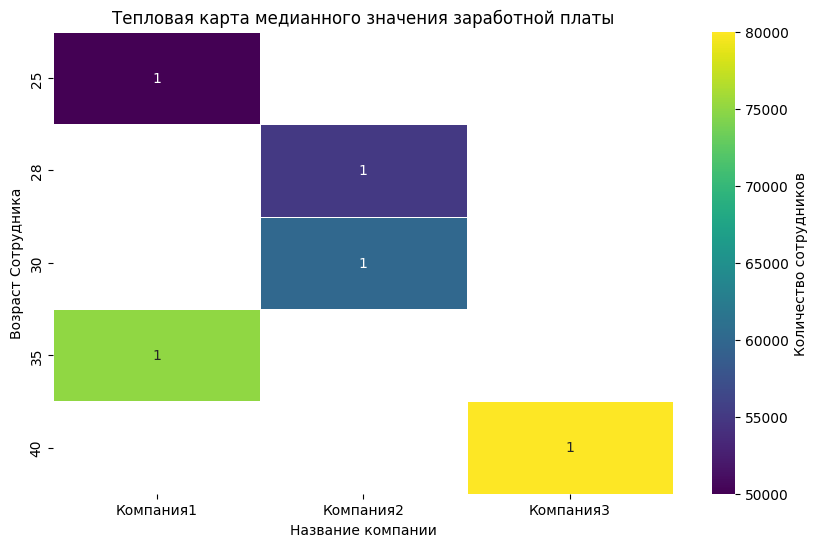

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем пример данных
data = {
    'Название компании': ['Компания1', 'Компания2', 'Компания1', 'Компания2', 'Компания3'],
    'Возраст Сотрудника': [25, 30, 35, 28, 40],
    'Размер заработной платы': [50000, 60000, 75000, 55000, 80000]
}

df = pd.DataFrame(data)

# Создаем тепловую карту
heatmap_data = df.pivot_table(index='Возраст Сотрудника', columns='Название компании', values='Размер заработной платы', aggfunc='median')

# Добавляем информацию о количестве участвовавших сотрудников
count_data = df.groupby(['Возраст Сотрудника', 'Название компании']).size().unstack(fill_value=0)
count_heatmap = count_data.reindex(heatmap_data.index)

# Строим тепловую карту с использованием seaborn
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=count_heatmap, cmap='viridis', fmt=".0f", linewidths=.5, cbar_kws={'label': 'Количество сотрудников'})
plt.title('Тепловая карта медианного значения заработной платы')
plt.show()
